In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
np.random.seed(42)
n_samples = 100
n_features = 5  

In [3]:
X = np.random.rand(n_samples, n_features) * 10
Y = 2*X[:,0] - 1.5*X[:,1] + 0.8*X[:,2] + np.random.randn(n_samples) * 2 

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'n_components': [2, 5, 10, 15],
    'scale': [True, False],
    'max_iter': [500, 1000, 2000],
    'tol': [1e-6, 1e-4, 1e-2]
}

In [5]:
pls = PLSRegression(n_components=2)
pls.fit(X_train, Y_train)

PLSRegression()

In [6]:
Y_pred = pls.predict(X_test)

In [7]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 3.7957
R-squared (R²): 0.9356


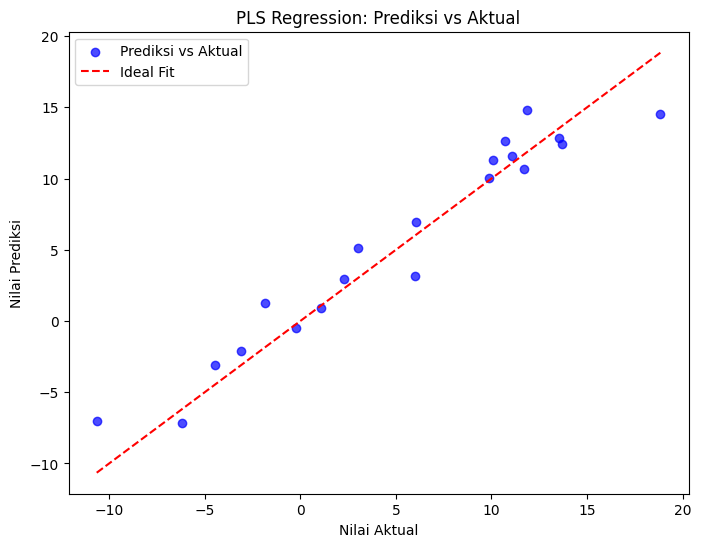

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.7, label="Prediksi vs Aktual")
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle="--", label="Ideal Fit")
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("PLS Regression: Prediksi vs Aktual")
plt.legend()
plt.show()